## Test flat variability

Flats are measureably different on relatively short timescales. For a difference of 100 days the flats can vary by 0.4%, this is taken as an acceptable limit. 

In [126]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np

from astropy.coordinates import SkyCoord
import astropy.units as u

from glob import glob
import pandas as pd
from astropy.stats import sigma_clip

In [2]:
d_cat = pd.read_csv('../pouakai/cal_lists/dark_list.csv')
f_cat = pd.read_csv('../pouakai/cal_lists/flat_list.csv')

In [3]:
dind = (d_cat['chip'].values == 3) & (d_cat['exptime'].values == 58)
dt = d_cat.iloc[dind]
dind = (d_cat['chip'].values == 3) & (d_cat['exptime'].values == 121)
df = d_cat.iloc[dind]

In [10]:
tmp = []
for file in df['filename']:
    im = fits.open(file)[0].data
    tmp += [im]
fdarks = np.array(tmp)
fdark = np.nanmedian(fdarks,axis=0)

In [16]:
find = (f_cat['chip'].values == 3) & (f_cat['note'].values == 'good') & (f_cat['band'].values == '                 R')  & (f_cat['exptime'].values == 121) # & (abs(f_cat['jd'].values - 2459560.5) <= 100)
flats_file = f_cat.iloc[find]

In [57]:
times = []
tmp = []
for file in flats_file['filename']:
    im = fits.open(file)[0].data
    im = im - fdark
    tmp += [im/np.nanmedian(im)]
    times += [fits.open(file)[0].header['JDSTART']]
flats = np.array(tmp)
flat = np.nanmedian(flats,axis=0)
times = np.array(times)

reshufle = np.argsort(times)
times = times[reshufle]
flats = flats[reshufle]


In [68]:
ind = np.where(np.diff(times) > 10)[0]
ind = np.insert(ind,0,0)
ind = np.append(ind,-1)

In [69]:
ind

array([ 0,  5, 10, 37, 40, 49, 54, 60, 77, 91, -1])

In [70]:
ft = []
for i in range(len(ind)-1):
    tmp = np.nanmedian(flats[ind[0]:ind[i+1]],axis=0)
    ft += [tmp]
    
ft = np.array(ft)

In [120]:
medt = []
for i in range(len(ind)-1):
    tmp = np.nanmedian(times[ind[0]:ind[i+1]])
    medt += [tmp]
medt = np.array(medt)
    

In [141]:
int(medt[-1] - medt[-3] + 0.5)

92

In [152]:
diff = ft[-1]-ft[-5]

In [153]:
mask = sigma_clip(diff,sigma=10).mask

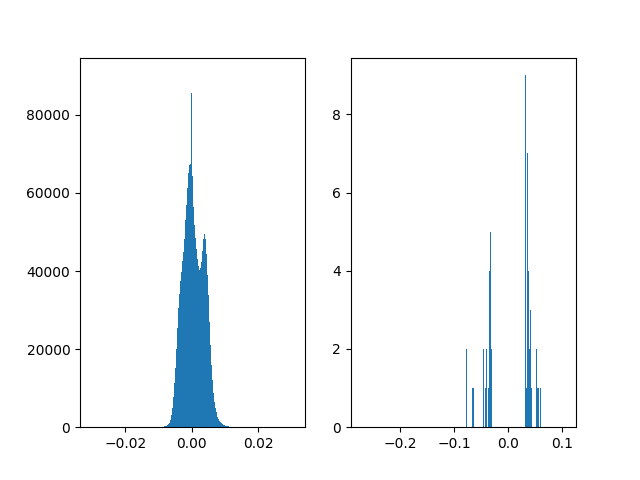

In [154]:
plt.figure()
plt.subplot(121)
plt.hist(diff[~mask].flatten(),bins=1000);
plt.subplot(122)
plt.hist(diff[mask].flatten(),bins=1000);

In [155]:
y,x = np.where(mask)

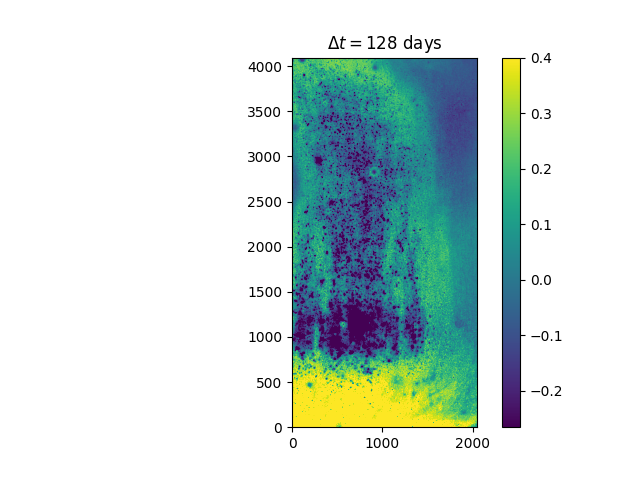

In [157]:
plt.figure()
plt.title(r'$\Delta t = $' + str(int(medt[-1] - medt[-4] + 0.5)) + ' days')
plt.imshow(diff*100,vmin=np.percentile(diff,16)*100,vmax=np.percentile(diff,84)*100,origin='lower')
#plt.plot(x,y,'C1.')
plt.colorbar()

In [132]:
1/100

0.01